<h1>Notebook para Pseudomonas </h1>

In [67]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
import gudhi as gd
import seaborn as sns
from statistics import mode
import multiprocessing
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import gudhi as gd
# from scipy.spatial.distance import hamming
import plotly.graph_objs as go
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio
from networkx.utils import not_implemented_for, pairwise
from concurrent.futures import ThreadPoolExecutor, as_completed

from module_functions import *

<h2>Se extrae la información </h2>

In [68]:
info=pd.read_csv('data/pscplos1246.blast',sep='\t',header=None)
minimum_score=100
info=info[info[11]>=minimum_score]
info.reset_index(drop=True,inplace=True)
info=info.loc[:,0:1]
names=pd.read_csv('data/Actinos.ids',sep='\t',dtype='object',header=None)

<h2>Se crean los data frames</h2>

In [69]:
info_by_pathway_and_genomes_directions=get_info_by_pathway_and_all_genomes_directions(info)
df_by_pathway,df_by_pathway_drop_duplicate,representative_genomes=get_df_by_pathway(info_by_pathway_and_genomes_directions)


In [70]:
L=[]
for i,j in df_by_pathway.items():
    print(list(j.columns))
    L.extend(list(j.columns))
len(L)

['Enzyme_26']
['Enzyme_215']
['Cysteine_synthase', 'glycine_hydroxymethyltransferase']
['N_acetyl_gamma_glutamyl_phosphate_reductase', 'Glutamate_5_semialdehyde_dehydrogenase', 'glutamate_synthase', 'Pyrroline_5_carboxylate_reductase', 'Acetylornithine_aminotransferase', 'N_acetylglutamate_synthase', 'Acetylglutamate_kinase', 'Ornithine_carbamoyltransferase', 'glutamate_dehydrogenase', 'Glutamine_2_oxoglutarate_aminotransferase', 'Argininosuccinate_synthase', 'Glutamine_synthetase']
['Tryptophan_synthase_alpha', 'Indole3glycerol_phosphate_synthase', 'Anthranilate_synthase_component_1', '3_dehydroquinate_synthase', 'phosphoribosylanthranilate_isomerase', 'Anthranilate_phosphoribosyltransferase', 'Tryptophan_synthase_beta']
['phosphoglycerate_kinase', 'Pyruvate_kinase', 'enolase']
['Threonine_synthase', 'dihydropicolinate_synthase', 'Aspartate_transaminase', 'diaminopimelate_decarboxylase', 'argininosuccinate_lyase']
['Ketoacid_reductoisomerase', 'Acetolactate_synthase_large_subunit', 'i

44

In [71]:
len(df_by_pathway.keys())

10

<h2> Se crea el complejo simplicial</h2>

In [72]:
complex_pathways=get_complex_by_pathways(df_by_pathway_drop_duplicate)

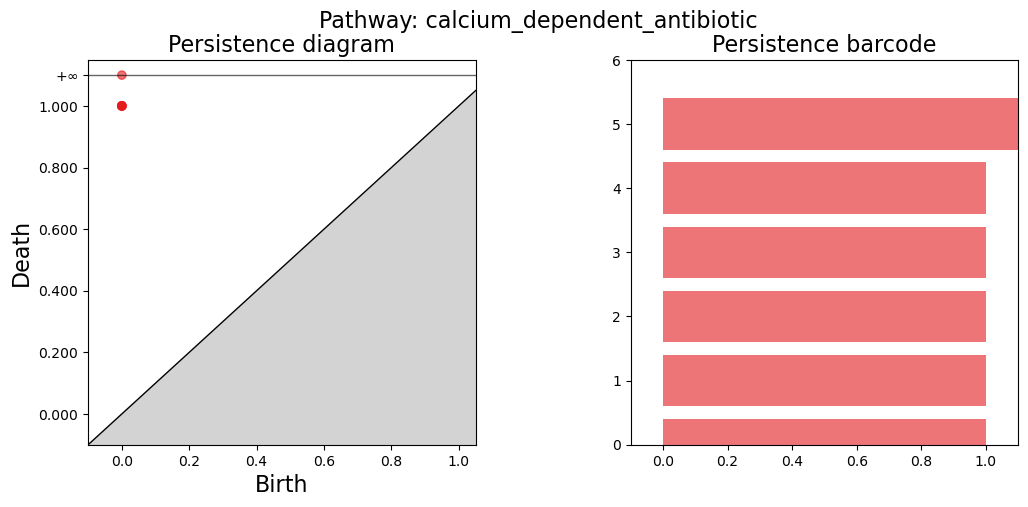

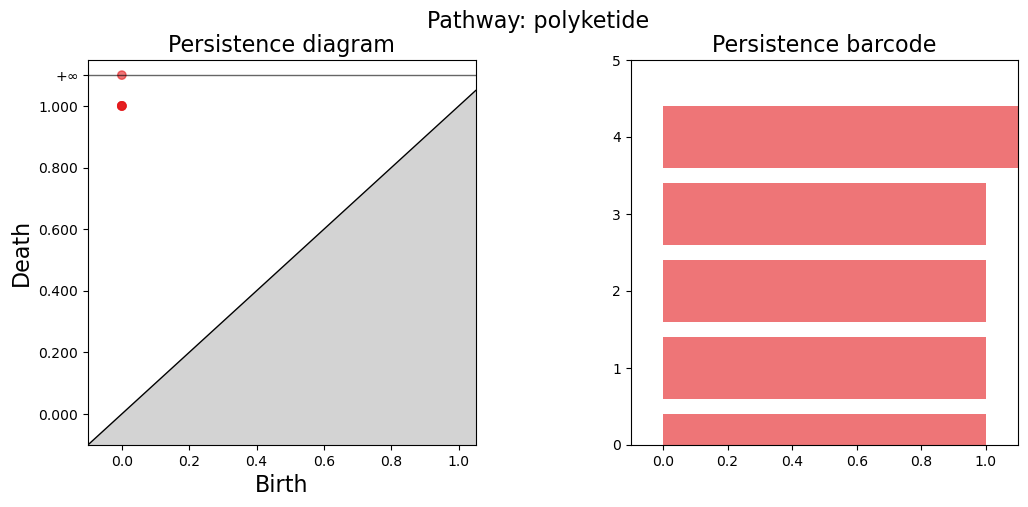

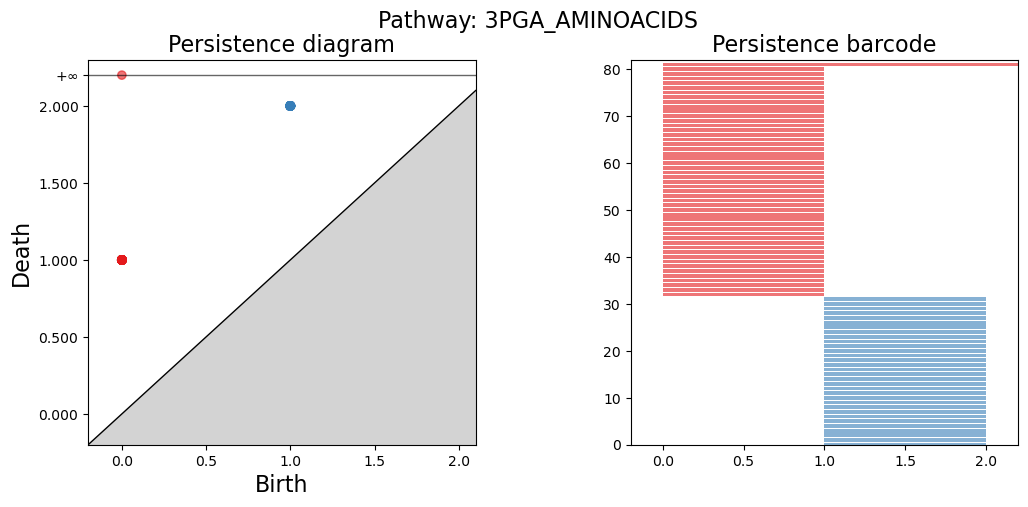

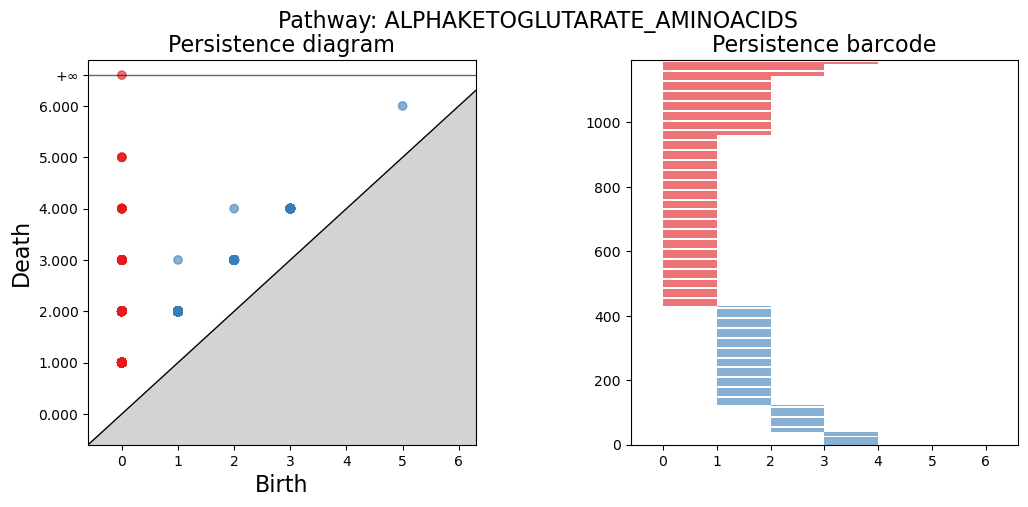

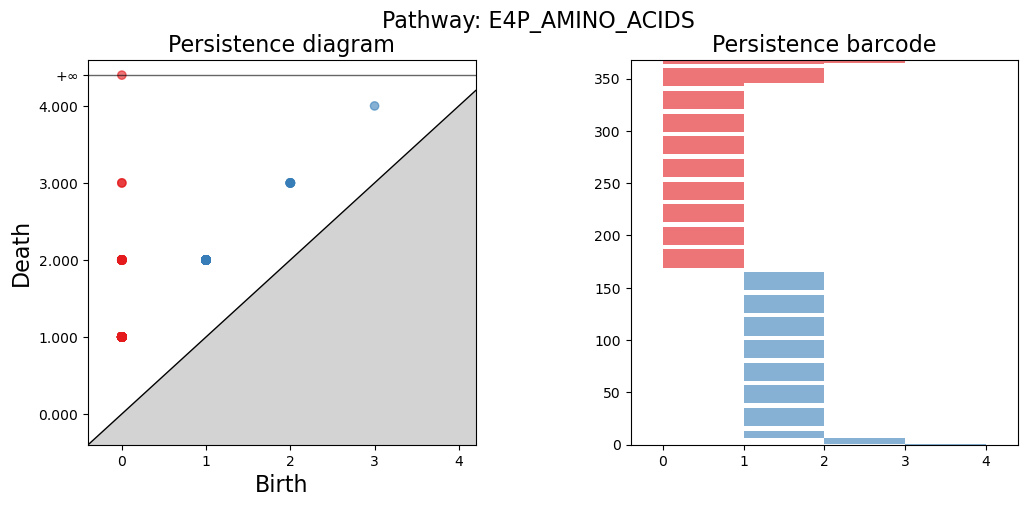

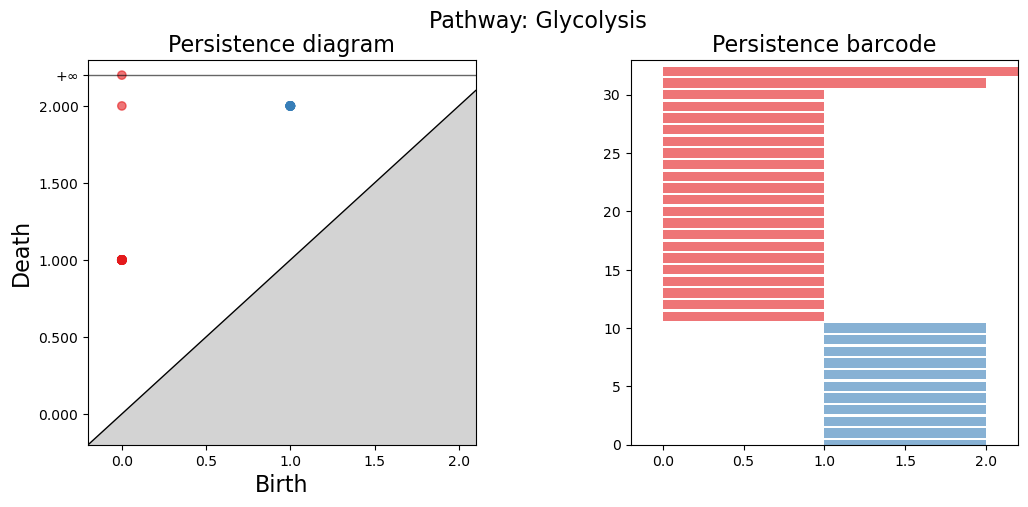

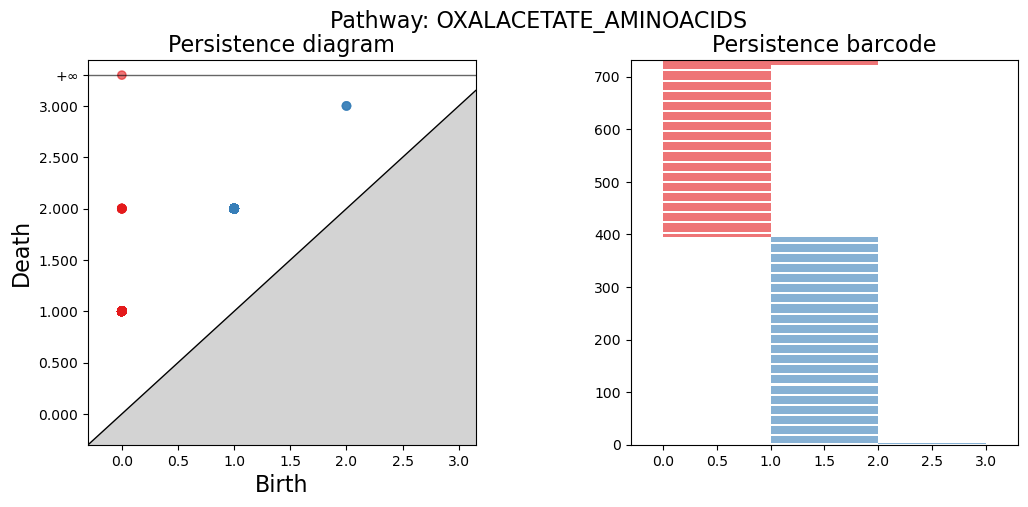

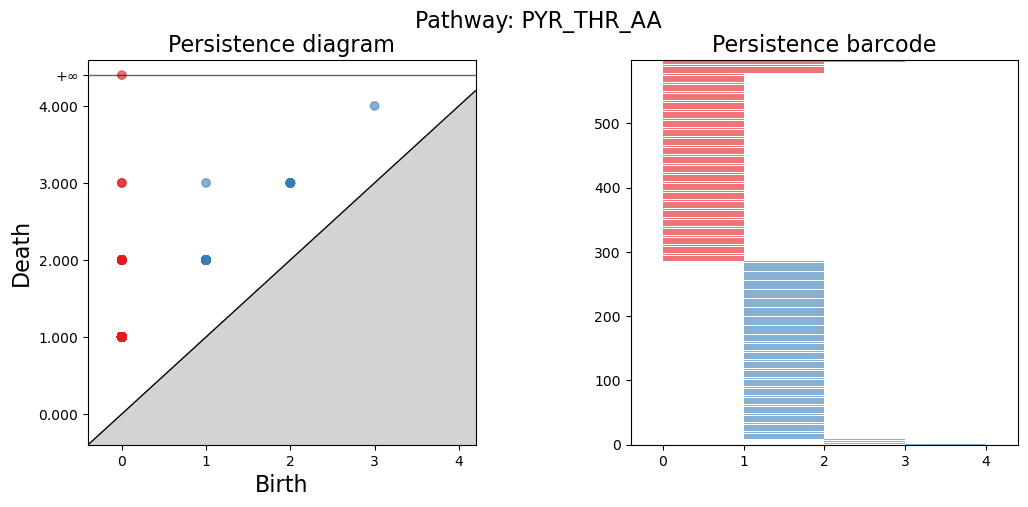

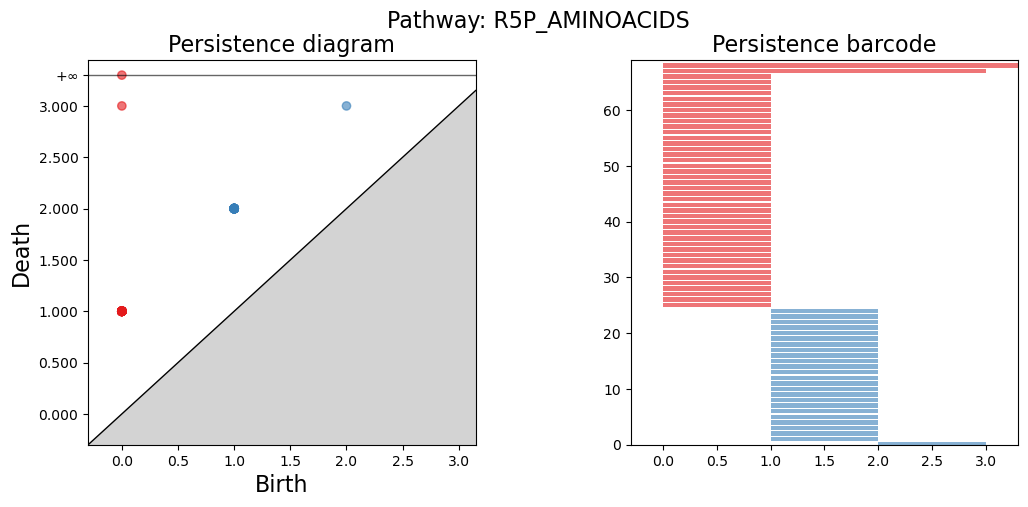

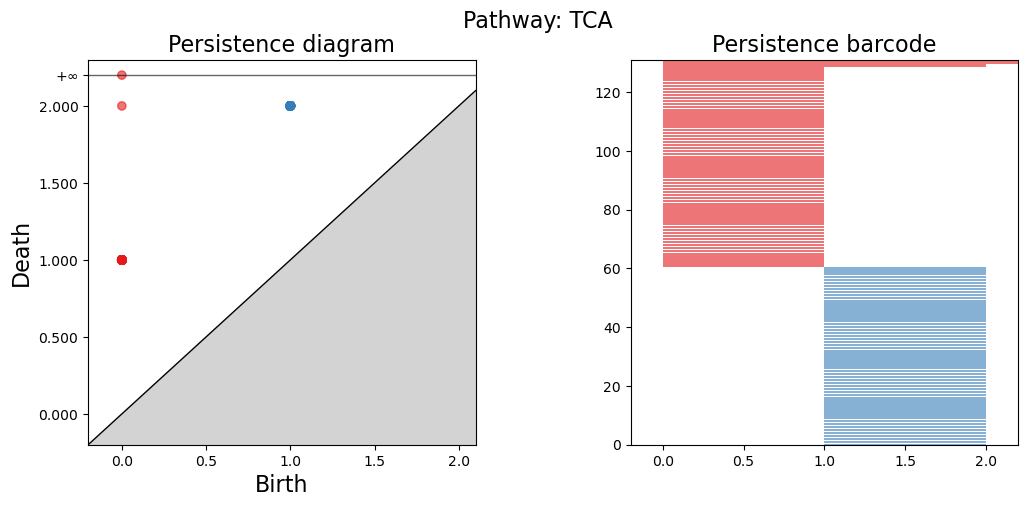

In [82]:
plot_all_bar_code_pathways(complex_pathways)

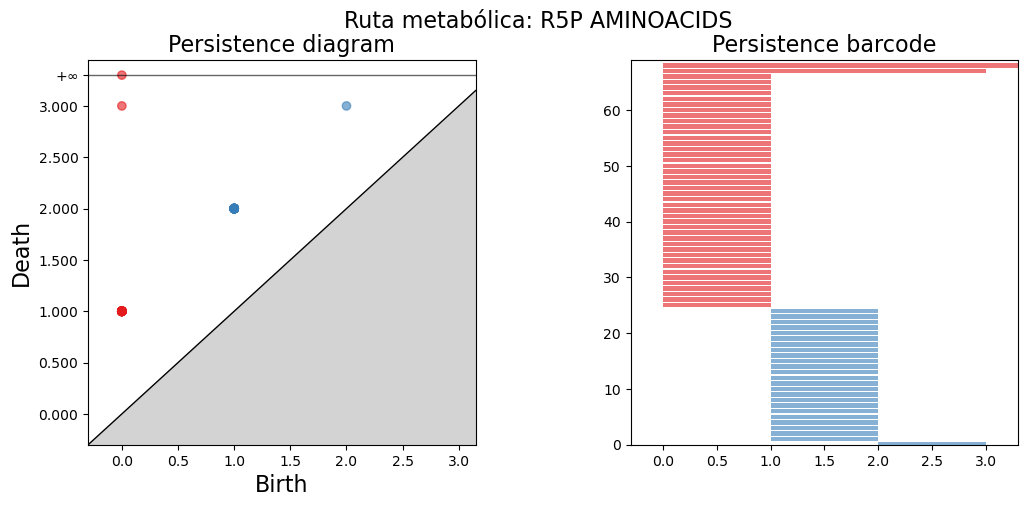

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        
gd.plot_persistence_diagram(persistence=complex_pathways['R5P_AMINOACIDS'][0], axes=axes[0])
gd.plot_persistence_barcode(persistence=complex_pathways['R5P_AMINOACIDS'][0], axes=axes[1])
        
        # Agregar un título a la figura
fig.suptitle(f'Ruta metabólica: R5P AMINOACIDS', fontsize=16)

        # Ajustar el espacio entre las figuras
plt.subplots_adjust(wspace=0.4)  # Cambia el valor según sea necesario
plt.savefig('persistence_barcode_R5P_AMINOACIDS.jpg')
plt.show()

In [5]:
#plot_all_bar_code_pathways(complex_pathways)

/opt/conda/envs/TDA/lib/python3.7/site-packages/seaborn/matrix.py:531: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



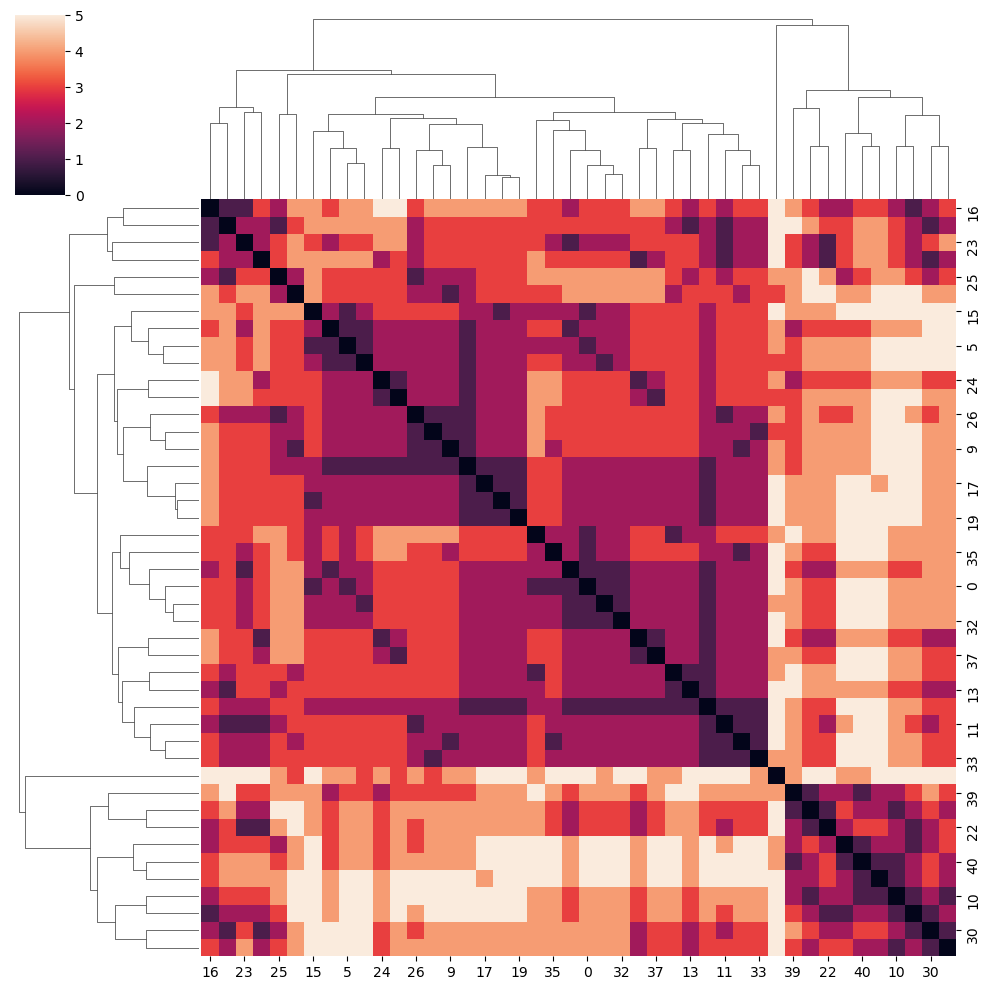

In [74]:
cg=sns.clustermap(calculate_hamming_matrix(df_by_pathway_drop_duplicate['R5P_AMINOACIDS'].values))
cg.savefig('heatmat.png')

<h2>Se buscan los uno hoyos</h2>

In [75]:
drop_dup_R5P={'R5P_AMINOACIDS':df_by_pathway_drop_duplicate['R5P_AMINOACIDS']}
compl_R5P={'R5P_AMINOACIDS':complex_pathways['R5P_AMINOACIDS']}

In [76]:
L=list(traduced_df(drop_dup_R5P['R5P_AMINOACIDS'],names).index)

In [77]:
holes_R5P_AMINOACIDS=get_holes_by_pathways(compl_R5P,drop_dup_R5P)

se buscan ciclos en el tiempo 2.0 para R5P_AMINOACIDS
Se encontró el ciclo [12, 23, 11, 1] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [36, 30, 27, 11] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [27, 16, 23, 11] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [36, 22, 23, 11] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [13, 27, 11, 1] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [31, 8, 1, 0] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [18, 36, 11, 1] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [29, 22, 21, 10] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [11, 26, 2, 1] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [40, 34, 29, 10] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [42, 30, 29, 10] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [18, 24, 2, 1] en el tiempo 1.0 para R5P_AMINOACIDS
Se encontró el ciclo [12, 14, 5, 0] en el tiempo 1.0 par

In [85]:
len(holes_R5P_AMINOACIDS['R5P_AMINOACIDS'])

25

In [37]:
visu(compl_R5P['R5P_AMINOACIDS'][1],1,'R5P_AMINOACIDS','Pseudomonas',)

plotly.graph_objs._figure.Figure

In [115]:
traduced_df(get_df_by_pathway_make_hole(drop_dup_R5P,holes_R5P_AMINOACIDS)['R5P_AMINOACIDS'][0],names)

,phosphoribosyl_isomerase_A,imidazole_glycerol_phosphate_synthase_H,ribosephosphate_pyrophosphokinase,histidinol_dehydrogenase,imidazoleglycerol_phosphate_dehydratase
R5P_AMINOACIDS,,,,,
Clavibacter michiganensis subsp. nebraskensis NCPPB 2581 NC_0208911,1,1,1,1,0
Corynebacterium Sp. Jcb CBYN01,0,1,1,1,0
Cellulomonas cellasea DSM 20118 AXNT01,0,1,1,1,1
Caldilinea aerophila DSM 14535 NC_017079.1,1,1,1,1,1


In [116]:
traduced_df(get_df_by_pathway_make_hole(drop_dup_R5P,holes_R5P_AMINOACIDS)['R5P_AMINOACIDS'][1],names)

,phosphoribosyl_isomerase_A,imidazole_glycerol_phosphate_synthase_H,ribosephosphate_pyrophosphokinase,histidinol_dehydrogenase,imidazoleglycerol_phosphate_dehydratase
R5P_AMINOACIDS,,,,,
Clavibacter michiganensis subsp. nebraskensis NCPPB 2581 NC_0208911,1,1,1,1,0
Corynebacterium Sp. Jcb CBYN01,0,1,1,1,0
Corynebacterium Sp. Gd7 CAVS02,0,1,1,0,0
Rothia mucilaginosa ATCC 25296 ACVO01,1,1,1,0,0


In [118]:
traduced_df(get_df_by_pathway_make_hole(drop_dup_R5P,holes_R5P_AMINOACIDS)['R5P_AMINOACIDS'][3],names)

,phosphoribosyl_isomerase_A,imidazole_glycerol_phosphate_synthase_H,ribosephosphate_pyrophosphokinase,histidinol_dehydrogenase,imidazoleglycerol_phosphate_dehydratase
R5P_AMINOACIDS,,,,,
Corynebacterium Sp. Gd7 CAVS02,0,1,1,0,0
Saccharomonospora halophila 8 AICX01,0,1,1,0,1
Actinoalloteichus cyanogriseus NRRL ISP-5103 JOAL01,1,1,1,0,1
Rothia mucilaginosa ATCC 25296 ACVO01,1,1,1,0,0


In [121]:
traduced_df(get_df_by_pathway_make_hole(drop_dup_R5P,holes_R5P_AMINOACIDS)['R5P_AMINOACIDS'][6],names)

,phosphoribosyl_isomerase_A,imidazole_glycerol_phosphate_synthase_H,ribosephosphate_pyrophosphokinase,histidinol_dehydrogenase,imidazoleglycerol_phosphate_dehydratase
R5P_AMINOACIDS,,,,,
Cellulomonas cellasea DSM 20118 AXNT01,0,1,1,1,1
Saccharomonospora halophila 8 AICX01,0,1,1,0,1
Actinoalloteichus cyanogriseus NRRL ISP-5103 JOAL01,1,1,1,0,1
Caldilinea aerophila DSM 14535 NC_017079.1,1,1,1,1,1


In [125]:
traduced_df(get_df_by_pathway_make_hole(drop_dup_R5P,holes_R5P_AMINOACIDS)['R5P_AMINOACIDS'][9],names)

,phosphoribosyl_isomerase_A,imidazole_glycerol_phosphate_synthase_H,ribosephosphate_pyrophosphokinase,histidinol_dehydrogenase,imidazoleglycerol_phosphate_dehydratase
R5P_AMINOACIDS,,,,,
Corynebacterium Sp. Gd7 CAVS02,0,1,1,0,0
Rothia mucilaginosa ATCC 25296 ACVO01,1,1,1,0,0
Dermabacter sp. HFH0086 ATFO01,1,0,1,0,0
Cryptobacterium curtum DSM 15641 NC_0131701,0,0,1,0,0


In [58]:
count=[]
for i in get_df_by_pathway_make_hole_droped_cols(drop_dup_R5P,holes_R5P_AMINOACIDS)['R5P_AMINOACIDS']:
    count.extend(i.columns)
for i in get_df_by_pathway_make_hole(drop_dup_R5P,holes_R5P_AMINOACIDS)['R5P_AMINOACIDS'][0].columns:
    print(i,count.count(i))

phosphoribosyl_isomerase_A 9
imidazole_glycerol_phosphate_synthase_H 11
ribosephosphate_pyrophosphokinase 13
histidinol_dehydrogenase 11
imidazoleglycerol_phosphate_dehydratase 7


In [24]:
import networkx as nx
import plotly.graph_objs as go
import plotly.offline

def visu(simplex_tree, filtration_value, path, family, vertex_names=None, ordered_names=None, save_filename=None, plot_size=1, dpi=600, pos=None):
    G = nx.Graph()
    triangles = []  # Lista para almacenar triángulos (simplices de 3 nodos)
    
    # Colores de los diferentes tipos de simplices
    color_nodes = 'rgba(0,0,0,1)'  # Negros para vértices (nodos)
    color_edges = 'rgba(169,169,169,0.6)'  # Gris para aristas
    color_triangles = 'rgba(0,0,255,0.2)'  # Azul claro para triángulos
    
    # Procesar los simpliciales de acuerdo al valor de filtración
    for simplex, filt in simplex_tree.get_filtration():
        if filt <= filtration_value:
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
            elif len(simplex) == 1:
                G.add_node(simplex[0])
            elif len(simplex) == 3:
                triangles.append(simplex)
    
    # Calcular las posiciones de los nodos si no se proporcionan
    if pos is None:
        pos = nx.spring_layout(G, dim=2)
    
    # Asignar nombres a los nodos si se proporciona 'ordered_names'
    if ordered_names:
        if len(ordered_names) != len(G.nodes()):
            raise ValueError("La longitud de 'ordered_names' debe coincidir con el número de nodos en el grafo.")
        
        # Asignar nombres a los nodos según el orden de la lista 'ordered_names'
        node_labels = {node: ordered_names[i] for i, node in enumerate(G.nodes())}
    else:
        node_labels = {node: str(node) for node in G.nodes()}
    
    # Traza de los nodos (vértices de 0-simplices)
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_trace = go.Scatter(
        x=x_values, y=y_values, mode='markers+text', hoverinfo='text', 
        marker=dict(size=14, color=color_nodes),  # Nodos en color negro
        text=[node_labels[node] for node in G.nodes()], textposition='top center', 
        textfont=dict(size=14)
    )
    
    # Traza de las aristas (simples de 2 nodos)
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None], mode='lines', 
            line=dict(width=3, color=color_edges)  # Aristas en color gris
        )
        edge_traces.append(edge_trace)
    
    # Traza de los triángulos (rellenados con un color uniforme)
    triangle_traces = []
    for triangle in triangles:
        x0, y0 = pos[triangle[0]]
        x1, y1 = pos[triangle[1]]
        x2, y2 = pos[triangle[2]]
        triangle_trace = go.Scatter(
            x=[x0, x1, x2, x0, None], y=[y0, y1, y2, y0, None], 
            fill='toself', mode='lines+markers', line=dict(width=2), 
            fillcolor=color_triangles  # Color azul claro para los triángulos
        )
        triangle_traces.append(triangle_trace)

    titulo = 'Complejo simplicial de la ruta ' + path + ' en ' + family + ' para nivel de filtración ' + str(filtration_value)
    
    # Configurar el diseño de la gráfica
    layout = go.Layout(
        showlegend=False, 
        hovermode='closest', 
        xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), 
        yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')),
        title=dict(text=titulo, x=0.5, xanchor='center', font=dict(size=24, family='Arial, sans-serif'))
    )
    
    # Crear la figura
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Establecer el tamaño de la figura
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Guardar la gráfica como un archivo HTML
    filename = path + '_' + family + '_t_' + str(filtration_value) + '.html'
    plotly.offline.plot(fig, filename=filename)
    
    return type(fig)


In [78]:
holes_by_pathway=change_vertex_to_name_per_path(df_by_pathway_drop_duplicate,holes_pathway_pseudo(),names,representative_genomes)

NameError: name 'change_vertex_to_name_per_path' is not defined

In [7]:
holes_by_pathway['calcium-dependent-antibiotic']=[]
holes_by_pathway['polyketide']=[]

In [8]:
resum=get_resum_df(df_by_pathway,complex_pathways,holes_by_pathway)
resum

/opt/conda/envs/TDA/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,num_columnas,num_hoyos,ciclos,ciclos por genero,duración hoyos
calcium-dependent-antibiotic,1,0,[],[],[]
polyketide,1,0,[],[],[]
3PGA_AMINOACIDS,2,9,[[[Pseudomonas aeruginosa str. Stone 130 AQFN0...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
ALPHAKETOGLUTARATE_AMINOACIDS,12,46,[[[Pseudomonas aeruginosa str. Stone 130 AQFN0...,"[[[Pseudomonas, Pseudomonas, Pseudomonas], [Ps...",[1.0]
E4P_AMINO_ACIDS,7,6,[[[Pseudomonas denitrificans ATCC 13867 NC_020...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
Glycolysis,3,2,[[[Pseudomonas denitrificans ATCC 13867 NC_020...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
OXALACETATE_AMINOACIDS,5,54,"[[[Pseudomonas deceptionensis JYKX01, Pseudomo...","[[[Pseudomonas, Pseudomonas, Pseudomonas], [Ps...",[1.0]
PYR_THR_AA,6,51,"[[[Pseudomonas monteilii QM AHGZ01, Pseudomona...","[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
R5P_AMINOACIDS,5,8,[[[Pseudomonas monteilii NBRC 103158 = DSM 141...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]
TCA,3,4,[[[Pseudomonas denitrificans ATCC 13867 NC_020...,"[[[Pseudomonas, Pseudomonas, Pseudomonas, Pseu...",[1.0]


In [10]:
ciclo=resum.loc['R5P_AMINOACIDS','ciclos'][0]
elementos_ciclo=[]
for i in ciclo:
    if type(i)==str:
        elementos_ciclo.append(i)
    else:
        elementos_ciclo.append(i[0])
elementos_ciclo

['Pseudomonas monteilii NBRC 103158 = DSM 14164 JHYV01',
 'Pseudomonas brassicacearum subsp. brassicacearum NFM421 NC_015379.1',
 'Pseudomonas alkylphenolia KL28',
 'Pseudomonas taeanensis ms-3 AWSQ01']

In [11]:
traduced_df(df_by_pathway_drop_duplicate['R5P_AMINOACIDS'],names).loc[elementos_ciclo]

,ribosephosphate_pyrophosphokinase,imidazoleglycerol_phosphate_dehydratase,imidazole_glycerol_phosphate_synthase_H,phosphoribosyl_isomerase_A,histidinol_dehydrogenase
R5P_AMINOACIDS,,,,,
Pseudomonas monteilii NBRC 103158 = DSM 14164 JHYV01,2,1,3,2,1
Pseudomonas brassicacearum subsp. brassicacearum NFM421 NC_015379.1,2,1,5,2,1
Pseudomonas alkylphenolia KL28,2,1,3,2,2
Pseudomonas taeanensis ms-3 AWSQ01,2,1,5,2,2


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

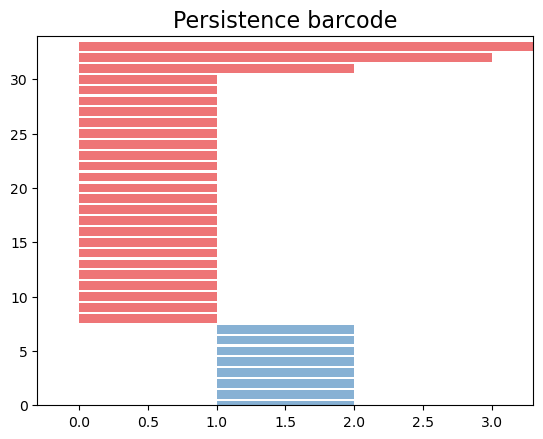

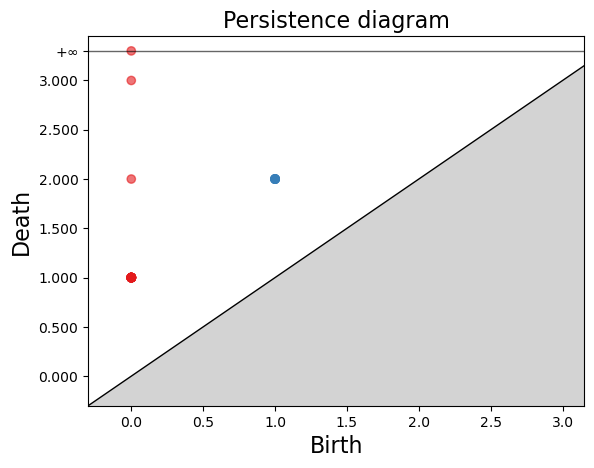

In [46]:
gd.plot_persistence_barcode(complex_pathways['R5P_AMINOACIDS'][0])
gd.plot_persistence_diagram(complex_pathways['R5P_AMINOACIDS'][0])

In [12]:
visualize_simplicial_complex(complex_pathways['R5P_AMINOACIDS'][1],1,'R5P_AMINOACIDS','Pseudomonas')

plotly.graph_objs._figure.Figure

<h2>Se buscan uno hoyos pero al separar por genero y ruta metabólica</h2>

In [94]:
df_by_genus_pathway,df_by_genus_pathway_drop_duplicate,representative_genomes_genus_pathway=get_df_by_genus_pathway(df_by_pathway,names)
complex_genus_pathways=get_complex_by_pathways(df_by_genus_pathway_drop_duplicate)

In [95]:
holes_genus_pathway=holes_los1246_genus()

In [97]:
resum_genus=get_resum_df(df_by_genus_pathway,representative_genomes_genus_pathway,names,complex_genus_pathways,holes_genus_pathway)
a=resum_genus[resum_genus['num_hoyos']!=0]

/opt/conda/envs/TDA/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



,num_columnas,num_hoyos,ciclos,ciclos por genero,duración hoyos
Rhodococcus_3PGA_AMINOACIDS,2,1,"[[Rhodococcus pyridinivorans AK37 AHBW01, [Rho...","[[Rhodococcus, [Rhodococcus, Rhodococcus], Rho...",[1.0]
Nocardia_3PGA_AMINOACIDS,2,4,"[[[Nocardia concava NBRC 100430 BAFX01, Nocard...","[[[Nocardia, Nocardia], [Nocardia, Nocardia], ...",[1.0]
Amycolatopsis_3PGA_AMINOACIDS,2,3,"[[Amycolatopsis mediterranei U32 NC_014318.1, ...","[[Amycolatopsis, Amycolatopsis, [Amycolatopsis...",[1.0]
Mycobacterium_3PGA_AMINOACIDS,2,4,"[[[Mycobacterium tuberculosis 209 LAB, Mycobac...","[[[Mycobacterium, Mycobacterium, Mycobacterium...",[1.0]
Arthrobacter_3PGA_AMINOACIDS,2,1,"[[Arthrobacter sp. W1 JWMD01, Arthrobacter ari...","[[Arthrobacter, Arthrobacter, [Arthrobacter, A...",[1.0]
...,...,...,...,...,...
Gordonia_TCA,3,3,"[[Gordonia Soli Nbrc 108243 BANX01, [Gordonia ...","[[Gordonia, [Gordonia, Gordonia, Gordonia, Gor...",[1.0]
Streptomyces_TCA,3,16,"[[[Streptomyces sp. NRRL F-5193 JOHZ01, Strept...","[[[Streptomyces, Streptomyces, Streptomyces, S...",[1.0]
Microbacterium_TCA,3,1,[[Microbacterium testaceum StLB037 NC_015125.1...,"[[Microbacterium, Microbacterium, [Microbacter...",[1.0]
Pseudonocardia_TCA,3,1,[[Pseudonocardia asaccharolytica DSM 44247 = N...,"[[Pseudonocardia, [Pseudonocardia, Pseudonocar...",[1.0]


In [98]:
complex_genus_R5P_AMINOACIDS={}
df_by_genus_R5P_AMINOACIDS_drop_duplicate={}
representative_genomes_by_genus_R5P_AMINOACIDS={}
df_by_genus_pathway_R5P_AMINOACIDS={}
for key in complex_genus_pathways.keys():
    if 'R5P_AMINOACIDS' in key:
        df_by_genus_pathway_R5P_AMINOACIDS[key]=df_by_genus_pathway[key]
        complex_genus_R5P_AMINOACIDS[key]=complex_genus_pathways[key]
        df_by_genus_R5P_AMINOACIDS_drop_duplicate[key]=df_by_genus_pathway_drop_duplicate[key]
        representative_genomes_by_genus_R5P_AMINOACIDS[key]=representative_genomes_genus_pathway[key]

In [88]:
len(df_by_genus_pathway_R5P_AMINOACIDS.keys())

193

In [89]:
holes_R5P_AMINOACIDS_GENUS=get_holes_by_pathways(complex_genus_R5P_AMINOACIDS,df_by_genus_R5P_AMINOACIDS_drop_duplicate)

se buscan ciclos en el tiempo 2.0 para Nocardia_R5P_AMINOACIDS
Se encontró el ciclo [3, 2, 1, 0] en el tiempo 1.0 para Nocardia_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Streptomyces_R5P_AMINOACIDS
Se encontró el ciclo [6, 13, 1, 0] en el tiempo 1.0 para Streptomyces_R5P_AMINOACIDS
Se encontró el ciclo [14, 5, 1, 0] en el tiempo 1.0 para Streptomyces_R5P_AMINOACIDS
Se encontró el ciclo [3, 2, 1, 0] en el tiempo 1.0 para Streptomyces_R5P_AMINOACIDS
Se encontró el ciclo [4, 10, 1, 0] en el tiempo 1.0 para Streptomyces_R5P_AMINOACIDS
Se encontró el ciclo [8, 15, 1, 0] en el tiempo 1.0 para Streptomyces_R5P_AMINOACIDS
Se encontró el ciclo [17, 12, 8, 0] en el tiempo 1.0 para Streptomyces_R5P_AMINOACIDS
Se encontró el ciclo [17, 16, 1, 0] en el tiempo 1.0 para Streptomyces_R5P_AMINOACIDS


In [101]:
a=get_resum_df(df_by_genus_pathway_R5P_AMINOACIDS,representative_genomes_by_genus_R5P_AMINOACIDS,names,complex_genus_R5P_AMINOACIDS,holes_R5P_AMINOACIDS_GENUS)

/opt/conda/envs/TDA/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [103]:
a[a['num_hoyos']!=0]

,num_columnas,num_hoyos,ciclos,ciclos por genero,duración hoyos
Nocardia_R5P_AMINOACIDS,5,1,[[[Nocardia otitidiscaviarum NBRC 14405 BAGD01...,"[[[Nocardia, Nocardia, Nocardia, Nocardia, Noc...",[1.0]
Streptomyces_R5P_AMINOACIDS,5,7,"[[[Streptomyces floridae JOAC01, Streptomyces ...","[[[Streptomyces, Streptomyces, Streptomyces, S...",[1.0]


In [92]:
len(holes_R5P_AMINOACIDS_GENUS['Nocardia_R5P_AMINOACIDS'])

1

In [66]:
df_holes_R5P_AMINOACIDS_droped_cols=get_df_by_pathway_make_hole_droped_cols(df_by_genus_R5P_AMINOACIDS_drop_duplicate,holes_R5P_AMINOACIDS)

In [70]:
for i,j in df_holes_R5P_AMINOACIDS_droped_cols.items():
    if j==[]:
        continue
    else:
        print(i)

Nocardia_R5P_AMINOACIDS
Streptomyces_R5P_AMINOACIDS


In [72]:
contar=[]
for i in df_holes_R5P_AMINOACIDS_droped_cols['Nocardia_R5P_AMINOACIDS']:
    contar.extend(i)
for j in df_by_pathway['R5P_AMINOACIDS'].columns:
    print(j,contar.count(j))
    

phosphoribosyl_isomerase_A 0
imidazole_glycerol_phosphate_synthase_H 0
ribosephosphate_pyrophosphokinase 1
histidinol_dehydrogenase 1
imidazoleglycerol_phosphate_dehydratase 0


In [71]:
contar=[]
for i in df_holes_R5P_AMINOACIDS_droped_cols['Streptomyces_R5P_AMINOACIDS']:
    contar.extend(i)
for j in df_by_pathway['R5P_AMINOACIDS'].columns:
    print(j,contar.count(j))
    

phosphoribosyl_isomerase_A 0
imidazole_glycerol_phosphate_synthase_H 4
ribosephosphate_pyrophosphokinase 6
histidinol_dehydrogenase 4
imidazoleglycerol_phosphate_dehydratase 0


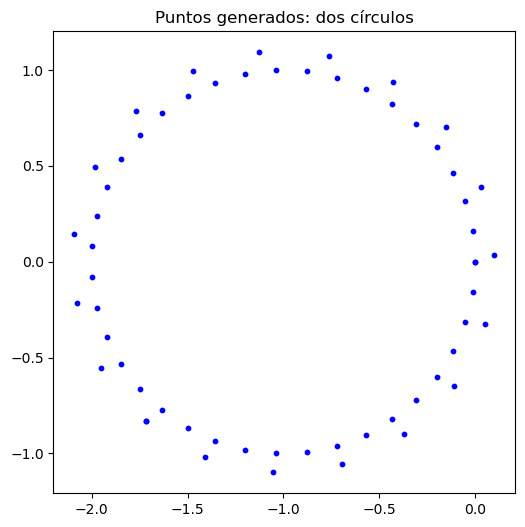

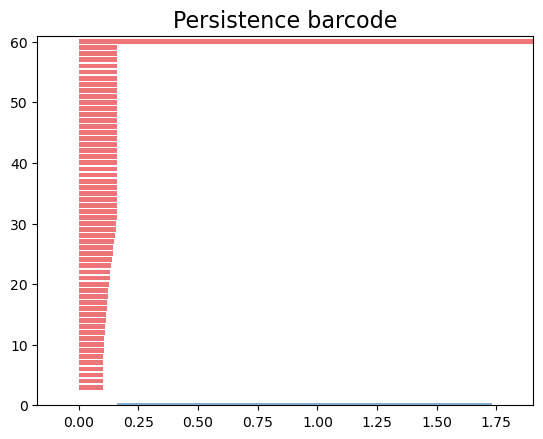

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

# Generación de dos círculos con un pequeño desplazamiento entre ellos
theta = np.linspace(0, 2 * np.pi, 40)
theta1 = np.linspace(0, 2 * np.pi, 20)+4

circle2 = np.array([np.cos(theta), np.sin(theta)]).T + [-1, 0]  # Segundo círculo en (-1,0)
circle3 = np.array([1.1*np.cos(theta1), 1.1*np.sin(theta1)]).T + [-1, 0]
# Unir ambos círculos
points = np.vstack([circle2, circle3])

# Graficar los puntos
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], s=10, color='b')
plt.title("Puntos generados: dos círculos")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Construcción del complejo simplicial utilizando los puntos
# Usamos un complejo de Vietoris-Rips
rips_complex = gd.RipsComplex(points=points, max_edge_length=2)  # Definimos el máximo de distancia entre puntos
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)  # Definimos la dimensión máxima (2 para ciclos)

# Calcular la homología persistente
pers = simplex_tree.persistence()

# Visualizar el diagrama de persistencia

gd.plot_persistence_barcode(pers)

plt.show()


In [30]:
def find_all_cycles(complex_dict):
    complex_path=complex_dict[0]
    persistence,simplex_tree=complex_dict[1]
    born_and_number = born_filtraton_value_holes(persistence)
    G=nx.Graph()
    born=born_and_number.keys()
    ciclos_dep=set()
    filtration=0
    for simplex, filt in simplex_tree.get_filtration():
        #if len(ciclos_dep)==num_holes:
         #   break
        
        if filtration!=filt and filtration in born:
            number=born_and_number[filtration]

            print('se buscan ciclos en el tiempo', filt,'para',complex_path)
            ciclos=minimum_cycle_basis(G,total=number)
            for ciclo in ciclos:
                if len(ciclo)>3:
                    print('Se encontró el ciclo',ciclo,'en el tiempo', filtration,'para',complex_path)
                    ciclos_dep.add(tuple(ciclo))
                    save_graph_visualization(G, filt, filt, save_filename=None, plot_size=1, dpi=600, pos=None)
                    #Se llena el hoyo
                    for i in ciclo:
                        for j in ciclo:
                            G.add_edge(i,j)
                            
            
        filtration=filt
        
        if len(simplex)==2:
            G.add_edge(simplex[0], simplex[1])


    #direc='pseudomonas_'+complex_path+'.txt'
    #f = open(direc, "a")
    #f.write(str(ciclos_dep))
    #f.close()
        

    return [complex_path,ciclos_dep]

In [29]:
import networkx as nx
import plotly.graph_objs as go
import plotly.offline

def save_graph_visualization(G, path, family, save_filename=None, plot_size=1, dpi=600, pos=None):
    """
    Dada una gráfica de NetworkX, guarda una visualización interactiva con el mismo formato de colores que la función original.
    
    Args:
    G (networkx.Graph): El grafo a visualizar.
    path (str): El nombre de la ruta (para el título y archivo).
    family (str): El nombre de la familia (para el título y archivo).
    save_filename (str, optional): El nombre de archivo para guardar el gráfico. Si no se proporciona, se genera uno automáticamente.
    plot_size (float, optional): Escala de tamaño para el gráfico. Por defecto es 1.
    dpi (int, optional): Resolución del gráfico. Por defecto es 600.
    pos (dict, optional): Posiciones de los nodos. Si no se proporciona, se usa `spring_layout`.
    
    Returns:
    None
    """
    # Colores de los diferentes tipos de simplices
    color_nodes = 'rgba(0,0,0,1)'  # Negros para vértices (nodos)
    color_edges = 'rgba(169,169,169,0.6)'  # Gris para aristas

    # Calcular las posiciones de los nodos si no se proporcionan
    if pos is None:
        pos = nx.spring_layout(G, dim=2)

    # Traza de los nodos (vértices de 0-simplices)
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_trace = go.Scatter(
        x=x_values, y=y_values, mode='markers+text', hoverinfo='text', 
        marker=dict(size=14, color=color_nodes),  # Nodos en color negro
        text=[str(node) for node in G.nodes()], textposition='top center', 
        textfont=dict(size=14)
    )
    
    # Traza de las aristas (simples de 2 nodos)
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None], mode='lines', 
            line=dict(width=3, color=color_edges)  # Aristas en color gris
        )
        edge_traces.append(edge_trace)
    
    # Titulo de la visualización
    titulo = f'Visualización del grafo {path} en {family}'
    
    # Configuración del layout
    layout = go.Layout(
        showlegend=False, 
        hovermode='closest', 
        xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), 
        yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')),
        title=dict(text=titulo, x=0.5, xanchor='center', font=dict(size=24, family='Arial, sans-serif'))
    )
    
    # Crear la figura
    fig = go.Figure(data=edge_traces + [node_trace], layout=layout)
    
    # Establecer el tamaño de la figura
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Generar el nombre del archivo si no se proporciona
    if save_filename is None:
        save_filename = f'{path}_{family}_graph.html'
    
    # Guardar la visualización como un archivo HTML
    plotly.offline.plot(fig, filename=save_filename)
    
    return None


In [49]:
import numpy as np
import networkx as nx
import plotly.graph_objects as go

# Generar los puntos de los círculos
theta = np.linspace(0, 2 * np.pi, 20)

# Primer círculo en (1,0) con radio 0.5
circle1 = np.array([0.5 * np.cos(theta), 0.5 * np.sin(theta)]).T + [1, 0]

# Segundo círculo en (-1,0) con radio 1
circle2 = np.array([np.cos(theta), np.sin(theta)]).T + [-1, 0]

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos para cada punto en los círculos
for i, point in enumerate(circle1):
    G.add_node(f"circle1_{i}", pos=point)

for i, point in enumerate(circle2):
    G.add_node(f"circle2_{i}", pos=point)

# Añadir aristas dentro de cada círculo (conectar puntos consecutivos)
for i in range(len(circle1) - 1):
    G.add_edge(f"circle1_{i}", f"circle1_{i + 1}")

# Conectar el último punto del círculo1 con el primero (cerrar el círculo)
G.add_edge(f"circle1_{len(circle1) - 1}", f"circle1_0")

# Añadir aristas dentro de circle2
for i in range(len(circle2) - 1):
    G.add_edge(f"circle2_{i}", f"circle2_{i + 1}")

# Conectar el último punto del círculo2 con el primero (cerrar el círculo)
G.add_edge(f"circle2_{len(circle2) - 1}", f"circle2_0")

# Visualizar el grafo con Plotly y exportar a HTML
pos = nx.get_node_attributes(G, 'pos')  # Obtener las posiciones de los nodos

# Extraer las coordenadas de los nodos
x_values = [pos[node][0] for node in G.nodes()]
y_values = [pos[node][1] for node in G.nodes()]

# Crear las aristas
edges_x = []
edges_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edges_x.append(x0)
    edges_x.append(x1)
    edges_y.append(y0)
    edges_y.append(y1)

# Crear la figura con Plotly
fig = go.Figure()

# Añadir las aristas
fig.add_trace(go.Scatter(x=edges_x, y=edges_y, mode='lines', line=dict(color='black', width=0.5)))

# Añadir los nodos
fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='markers', marker=dict(size=8, color='blue')))

# Configurar la apariencia de la visualización
fig.update_layout(
    title="Grafo de los dos círculos",
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    height=600,
    width=600,
    plot_bgcolor='white',
)

# Guardar la visualización como un archivo HTML
fig.write_html("circles_graph.html")


In [50]:
import networkx as nx
import numpy as np
import plotly.graph_objs as go
import plotly.offline

def plot_circles_graph(circles, path, family, filtration_value, plot_size=1, dpi=600, pos=None):
    G = nx.Graph()
    triangles = []  # Lista para almacenar triángulos (simplices de 3 nodos)
    
    # Colores de los diferentes tipos de simplices
    color_nodes = 'rgba(0,0,0,1)'  # Negros para vértices (nodos)
    color_edges = 'rgba(169,169,169,0.6)'  # Gris para aristas
    color_triangles = 'rgba(0,0,255,0.2)'  # Azul claro para triángulos
    
    # Añadir nodos y aristas de los círculos
    for i, circle in enumerate(circles):
        # Añadir nodos
        for j, point in enumerate(circle):
            node_name = f"circle_{i}_node_{j}"
            G.add_node(node_name, pos=point)
        
        # Añadir aristas dentro de cada círculo (conectar puntos consecutivos)
        for j in range(len(circle) - 1):
            G.add_edge(f"circle_{i}_node_{j}", f"circle_{i}_node_{j + 1}")
        
        # Conectar el último punto con el primero para cerrar el círculo
        G.add_edge(f"circle_{i}_node_{len(circle) - 1}", f"circle_{i}_node_0")
    
    # Calcular las posiciones de los nodos si no se proporcionan
    if pos is None:
        pos = nx.spring_layout(G, dim=2)
    
    # Traza de los nodos (vértices de 0-simplices)
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_trace = go.Scatter(
        x=x_values, y=y_values, mode='markers+text', hoverinfo='text', 
        marker=dict(size=14, color=color_nodes),  # Nodos en color negro
        text=[node for node in G.nodes()], textposition='top center', 
        textfont=dict(size=14)
    )
    
    # Traza de las aristas (simples de 2 nodos)
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None], mode='lines', 
            line=dict(width=3, color=color_edges)  # Aristas en color gris
        )
        edge_traces.append(edge_trace)
    
    # No hay triángulos en este caso, pero si hay triángulos se agregarían aquí.
    triangle_traces = []  # En este caso no se añadirán triángulos

    # Título de la visualización
    titulo = f'Complejo simplicial de la ruta {path} en {family} para nivel de filtración {filtration_value}'
    
    # Configurar el diseño de la gráfica
    layout = go.Layout(
        showlegend=False, 
        hovermode='closest', 
        xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), 
        yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')),
        title=dict(text=titulo, x=0.5, xanchor='center', font=dict(size=24, family='Arial, sans-serif'))
    )
    
    # Crear la figura
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Establecer el tamaño de la figura
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Guardar la gráfica como un archivo HTML
    filename = f"{path}_{family}_t_{str(filtration_value)}.html"
    plotly.offline.plot(fig, filename=filename)
    
    return type(fig)


# Generar dos círculos y visualizarlos
theta = np.linspace(0, 2 * np.pi, 20)
circle1 = np.array([0.5 * np.cos(theta), 0.5 * np.sin(theta)]).T + [1, 0]  # Círculo 1
circle2 = np.array([np.cos(theta), np.sin(theta)]).T + [-1, 0]  # Círculo 2

circles = [circle1, circle2]

# Llamar a la función para visualizar los círculos
plot_circles_graph(circles, path="path_to_complex", family="family_name", filtration_value=1)


plotly.graph_objs._figure.Figure

In [51]:
import networkx as nx
import numpy as np
import plotly.graph_objs as go
import plotly.offline

def plot_circles_graph(circles, path, family, filtration_value, plot_size=1, dpi=600, pos=None):
    G = nx.Graph()
    triangles = []  # Lista para almacenar triángulos (simplices de 3 nodos)
    
    # Colores de los diferentes tipos de simplices
    color_nodes = 'rgba(0,0,0,1)'  # Negros para vértices (nodos)
    color_edges = 'rgba(169,169,169,0.6)'  # Gris para aristas
    color_triangles = 'rgba(0,0,255,0.2)'  # Azul claro para triángulos
    
    # Añadir nodos y aristas de los círculos
    for i, circle in enumerate(circles):
        # Añadir nodos
        for j, point in enumerate(circle):
            node_name = f"circle_{i}_node_{j}"
            G.add_node(node_name, pos=point)
        
        # Añadir aristas dentro de cada círculo (conectar puntos consecutivos)
        for j in range(len(circle) - 1):
            G.add_edge(f"circle_{i}_node_{j}", f"circle_{i}_node_{j + 1}")
        
        # Conectar el último punto con el primero para cerrar el círculo
        G.add_edge(f"circle_{i}_node_{len(circle) - 1}", f"circle_{i}_node_0")
    
    # Calcular las posiciones de los nodos si no se proporcionan
    if pos is None:
        pos = nx.spring_layout(G, dim=2)
    
    # Traza de los nodos (vértices de 0-simplices)
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_trace = go.Scatter(
        x=x_values, y=y_values, mode='markers', hoverinfo='none',  # Nodos sin texto
        marker=dict(size=14, color=color_nodes)  # Nodos en color negro
    )
    
    # Traza de las aristas (simples de 2 nodos)
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None], mode='lines', 
            line=dict(width=3, color=color_edges)  # Aristas en color gris
        )
        edge_traces.append(edge_trace)
    
    # No hay triángulos en este caso, pero si hay triángulos se agregarían aquí.
    triangle_traces = []  # En este caso no se añadirán triángulos

    # Título de la visualización
    titulo = f'Complejo simplicial de la ruta {path} en {family} para nivel de filtración {filtration_value}'
    
    # Configurar el diseño de la gráfica
    layout = go.Layout(
        showlegend=False, 
        hovermode='closest', 
        xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), 
        yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')),
        title=dict(text=titulo, x=0.5, xanchor='center', font=dict(size=24, family='Arial, sans-serif'))
    )
    
    # Crear la figura
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Establecer el tamaño de la figura
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Guardar la gráfica como un archivo HTML
    filename = f"{path}_{family}_t_{str(filtration_value)}.html"
    plotly.offline.plot(fig, filename=filename)
    
    return type(fig)


# Generar dos círculos y visualizarlos
theta = np.linspace(0, 2 * np.pi, 20)
circle1 = np.array([0.5 * np.cos(theta), 0.5 * np.sin(theta)]).T + [1, 0]  # Círculo 1
circle2 = np.array([np.cos(theta), np.sin(theta)]).T + [-1, 0]  # Círculo 2

circles = [circle1, circle2]

# Llamar a la función para visualizar los círculos
plot_circles_graph(circles, path="path_to_complex", family="family_name", filtration_value=1)


plotly.graph_objs._figure.Figure

In [52]:
import networkx as nx
import numpy as np
import plotly.graph_objs as go
import plotly.offline

def plot_circles_graph(circles, path, family, filtration_value, plot_size=1, dpi=600):
    G = nx.Graph()
    triangles = []  # Lista para almacenar triángulos (simplices de 3 nodos)
    
    # Colores de los diferentes tipos de simplices
    color_nodes = 'rgba(0,0,0,1)'  # Negros para vértices (nodos)
    color_edges = 'rgba(169,169,169,0.6)'  # Gris para aristas
    color_triangles = 'rgba(0,0,255,0.2)'  # Azul claro para triángulos
    
    pos = {}  # Diccionario para almacenar las posiciones exactas de los nodos
    
    # Añadir nodos y aristas de los círculos
    for i, circle in enumerate(circles):
        # Añadir nodos y establecer sus posiciones exactas
        for j, point in enumerate(circle):
            node_name = f"circle_{i}_node_{j}"
            G.add_node(node_name)
            pos[node_name] = point  # Asignar la posición exacta
        
        # Añadir aristas dentro de cada círculo (conectar puntos consecutivos)
        for j in range(len(circle) - 1):
            G.add_edge(f"circle_{i}_node_{j}", f"circle_{i}_node_{j + 1}")
        
        # Conectar el último punto con el primero para cerrar el círculo
        G.add_edge(f"circle_{i}_node_{len(circle) - 1}", f"circle_{i}_node_0")
    
    # Traza de los nodos (vértices de 0-simplices)
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_trace = go.Scatter(
        x=x_values, y=y_values, mode='markers', hoverinfo='none',  # Nodos sin texto
        marker=dict(size=14, color=color_nodes)  # Nodos en color negro
    )
    
    # Traza de las aristas (simples de 2 nodos)
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None], mode='lines', 
            line=dict(width=3, color=color_edges)  # Aristas en color gris
        )
        edge_traces.append(edge_trace)
    
    # No hay triángulos en este caso, pero si hay triángulos se agregarían aquí.
    triangle_traces = []  # En este caso no se añadirán triángulos

    # Título de la visualización
    titulo = f'Complejo simplicial de la ruta {path} en {family} para nivel de filtración {filtration_value}'
    
    # Configurar el diseño de la gráfica
    layout = go.Layout(
        showlegend=False, 
        hovermode='closest', 
        xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), 
        yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')),
        title=dict(text=titulo, x=0.5, xanchor='center', font=dict(size=24, family='Arial, sans-serif'))
    )
    
    # Crear la figura
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Establecer el tamaño de la figura
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Guardar la gráfica como un archivo HTML
    filename = f"{path}_{family}_t_{str(filtration_value)}.html"
    plotly.offline.plot(fig, filename=filename)
    
    return type(fig)


# Generar dos círculos y visualizarlos
theta = np.linspace(0, 2 * np.pi, 20)
circle1 = np.array([0.5 * np.cos(theta), 0.5 * np.sin(theta)]).T + [1, 0]  # Círculo 1
circle2 = np.array([np.cos(theta), np.sin(theta)]).T + [-1, 0]  # Círculo 2

circles = [circle1, circle2]

# Llamar a la función para visualizar los círculos
plot_circles_graph(circles, path="path_to_complex", family="family_name", filtration_value=1)


plotly.graph_objs._figure.Figure

In [53]:
import networkx as nx
import numpy as np
import plotly.graph_objs as go
import plotly.offline

def plot_circles_graph(circles, path, family, filtration_value, plot_size=1, dpi=600):
    G = nx.Graph()
    triangles = []  # Lista para almacenar triángulos (simplices de 3 nodos)
    
    # Colores de los diferentes tipos de simplices
    color_nodes = 'rgba(0,0,0,1)'  # Negros para vértices (nodos)
    color_edges = 'rgba(169,169,169,0.6)'  # Gris para aristas
    color_triangles = 'rgba(0,0,255,0.2)'  # Azul claro para triángulos
    
    pos = {}  # Diccionario para almacenar las posiciones exactas de los nodos
    
    # Añadir nodos y aristas de los círculos
    for i, circle in enumerate(circles):
        # Añadir nodos y establecer sus posiciones exactas
        for j, point in enumerate(circle):
            node_name = f"circle_{i}_node_{j}"
            G.add_node(node_name)
            pos[node_name] = point  # Asignar la posición exacta
        
        # Añadir aristas dentro de cada círculo (conectar puntos consecutivos)
        for j in range(len(circle) - 1):
            G.add_edge(f"circle_{i}_node_{j}", f"circle_{i}_node_{j + 1}")
        
        # Conectar el último punto con el primero para cerrar el círculo
        G.add_edge(f"circle_{i}_node_{len(circle) - 1}", f"circle_{i}_node_0")
        
        # Llenar el círculo con triángulos (solo para el Círculo 1)
        if i == 0:  # Solo para el primer círculo
            for j in range(len(circle)):
                # Triángulos formados por tres vértices consecutivos
                triangle = [f"circle_0_node_{j}", f"circle_0_node_{(j + 1) % len(circle)}", f"circle_0_node_{(j + 2) % len(circle)}"]
                triangles.append(triangle)
    
    # Traza de los nodos (vértices de 0-simplices)
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_trace = go.Scatter(
        x=x_values, y=y_values, mode='markers', hoverinfo='none',  # Nodos sin texto
        marker=dict(size=14, color=color_nodes)  # Nodos en color negro
    )
    
    # Traza de las aristas (simples de 2 nodos)
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None], mode='lines', 
            line=dict(width=3, color=color_edges)  # Aristas en color gris
        )
        edge_traces.append(edge_trace)
    
    # Traza de los triángulos (rellenados con un color uniforme)
    triangle_traces = []
    for triangle in triangles:
        x0, y0 = pos[triangle[0]]
        x1, y1 = pos[triangle[1]]
        x2, y2 = pos[triangle[2]]
        triangle_trace = go.Scatter(
            x=[x0, x1, x2, x0, None], y=[y0, y1, y2, y0, None], 
            fill='toself', mode='lines+markers', line=dict(width=2), 
            fillcolor=color_triangles  # Color azul claro para los triángulos
        )
        triangle_traces.append(triangle_trace)

    # Título de la visualización
    titulo = f'Complejo simplicial de la ruta {path} en {family} para nivel de filtración {filtration_value}'
    
    # Configurar el diseño de la gráfica
    layout = go.Layout(
        showlegend=False, 
        hovermode='closest', 
        xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), 
        yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')),
        title=dict(text=titulo, x=0.5, xanchor='center', font=dict(size=24, family='Arial, sans-serif'))
    )
    
    # Crear la figura
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Establecer el tamaño de la figura
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Guardar la gráfica como un archivo HTML
    filename = f"{path}_{family}_t_{str(filtration_value)}.html"
    plotly.offline.plot(fig, filename=filename)
    
    return type(fig)


# Generar dos círculos y visualizarlos
theta = np.linspace(0, 2 * np.pi, 20)
circle1 = np.array([0.5 * np.cos(theta), 0.5 * np.sin(theta)]).T + [1, 0]  # Círculo 1
circle2 = np.array([np.cos(theta), np.sin(theta)]).T + [-1, 0]  # Círculo 2

circles = [circle1, circle2]

# Llamar a la función para visualizar los círculos con triángulos en el Círculo 1
plot_circles_graph(circles, path="pat", family="family_name", filtration_value=1)


plotly.graph_objs._figure.Figure

In [54]:
import networkx as nx
import numpy as np
import plotly.graph_objs as go
import plotly.offline

def plot_circles_graph(circles, path, family, filtration_value, plot_size=1, dpi=600):
    G = nx.Graph()
    triangles = []  # Lista para almacenar triángulos (simplices de 3 nodos)
    
    # Colores de los diferentes tipos de simplices
    color_nodes = 'rgba(0,0,0,1)'  # Negros para vértices (nodos)
    color_edges = 'rgba(169,169,169,0.6)'  # Gris para aristas
    color_triangles = 'rgba(0,0,255,0.2)'  # Azul claro para triángulos
    
    pos = {}  # Diccionario para almacenar las posiciones exactas de los nodos
    
    # Añadir nodos y aristas de los círculos
    for i, circle in enumerate(circles):
        # Añadir nodos y establecer sus posiciones exactas
        for j, point in enumerate(circle):
            node_name = f"circle_{i}_node_{j}"
            G.add_node(node_name)
            pos[node_name] = point  # Asignar la posición exacta
        
        # Añadir aristas dentro de cada círculo (conectar puntos consecutivos)
        for j in range(len(circle) - 1):
            G.add_edge(f"circle_{i}_node_{j}", f"circle_{i}_node_{j + 1}")
        
        # Conectar el último punto con el primero para cerrar el círculo
        G.add_edge(f"circle_{i}_node_{len(circle) - 1}", f"circle_{i}_node_0")
        
        # Si es el primer círculo (Círculo 1), conectar todos los vértices entre sí
        if i == 0:  # Solo para el primer círculo
            # Conectar todos los pares de vértices para formar los triángulos
            for j in range(len(circle)):
                for k in range(j + 1, len(circle)):  # Solo conectar el par una vez
                    G.add_edge(f"circle_0_node_{j}", f"circle_0_node_{k}")
    
    # Traza de los nodos (vértices de 0-simplices)
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_trace = go.Scatter(
        x=x_values, y=y_values, mode='markers', hoverinfo='none',  # Nodos sin texto
        marker=dict(size=14, color=color_nodes)  # Nodos en color negro
    )
    
    # Traza de las aristas (simples de 2 nodos)
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None], mode='lines', 
            line=dict(width=3, color=color_edges)  # Aristas en color gris
        )
        edge_traces.append(edge_trace)
    
    # Traza de los triángulos (rellenados con un color uniforme)
    triangle_traces = []
    for triangle in triangles:
        x0, y0 = pos[triangle[0]]
        x1, y1 = pos[triangle[1]]
        x2, y2 = pos[triangle[2]]
        triangle_trace = go.Scatter(
            x=[x0, x1, x2, x0, None], y=[y0, y1, y2, y0, None], 
            fill='toself', mode='lines+markers', line=dict(width=2), 
            fillcolor=color_triangles  # Color azul claro para los triángulos
        )
        triangle_traces.append(triangle_trace)

    # Título de la visualización
    titulo = f'Complejo simplicial de la ruta {path} en {family} para nivel de filtración {filtration_value}'
    
    # Configurar el diseño de la gráfica
    layout = go.Layout(
        showlegend=False, 
        hovermode='closest', 
        xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), 
        yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')),
        title=dict(text=titulo, x=0.5, xanchor='center', font=dict(size=24, family='Arial, sans-serif'))
    )
    
    # Crear la figura
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Establecer el tamaño de la figura
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Guardar la gráfica como un archivo HTML
    filename = f"{path}_{family}_t_{str(filtration_value)}.html"
    plotly.offline.plot(fig, filename=filename)
    
    return type(fig)


# Generar dos círculos y visualizarlos
theta = np.linspace(0, 2 * np.pi, 20)
circle1 = np.array([0.5 * np.cos(theta), 0.5 * np.sin(theta)]).T + [1, 0]  # Círculo 1
circle2 = np.array([np.cos(theta), np.sin(theta)]).T + [-1, 0]  # Círculo 2

circles = [circle1, circle2]

# Llamar a la función para visualizar los círculos con triángulos en el Círculo 1
plot_circles_graph(circles, path="pat", family="family_name", filtration_value=1)


plotly.graph_objs._figure.Figure

In [55]:
import networkx as nx
import numpy as np
import plotly.graph_objs as go
import plotly.offline

def plot_circles_graph(circles, path, family, filtration_value, plot_size=1, dpi=600):
    G = nx.Graph()
    triangles = []  # Lista para almacenar triángulos (simplices de 3 nodos)
    
    # Colores de los diferentes tipos de simplices
    color_nodes = 'rgba(0,0,0,1)'  # Negros para vértices (nodos)
    color_edges = 'rgba(169,169,169,0.6)'  # Gris para aristas
    color_triangles = 'rgba(0,0,255,0.2)'  # Azul claro para triángulos
    
    pos = {}  # Diccionario para almacenar las posiciones exactas de los nodos
    
    # Añadir nodos y aristas de los círculos
    for i, circle in enumerate(circles):
        # Añadir nodos y establecer sus posiciones exactas
        for j, point in enumerate(circle):
            node_name = f"circle_{i}_node_{j}"
            G.add_node(node_name)
            pos[node_name] = point  # Asignar la posición exacta
        
        # Añadir aristas dentro de cada círculo (conectar puntos consecutivos)
        for j in range(len(circle) - 1):
            G.add_edge(f"circle_{i}_node_{j}", f"circle_{i}_node_{j + 1}")
        
        # Conectar el último punto con el primero para cerrar el círculo
        G.add_edge(f"circle_{i}_node_{len(circle) - 1}", f"circle_{i}_node_0")
        
        # Si es el primer círculo (Círculo 1), conectar todos los vértices entre sí
        if i == 0:  # Solo para el primer círculo
            # Conectar todos los pares de vértices para formar los triángulos
            for j in range(len(circle)):
                for k in range(j + 1, len(circle)):  # Solo conectar el par una vez
                    G.add_edge(f"circle_0_node_{j}", f"circle_0_node_{k}")
    
    # Detectar los triángulos (conjunto de 3 nodos conectados entre sí)
    for node1 in G.nodes():
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 != node1 and G.has_edge(node1, node3):  # Asegurarnos de que los 3 nodos forman un triángulo
                    triangles.append([node1, node2, node3])

    # Traza de los nodos (vértices de 0-simplices)
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_trace = go.Scatter(
        x=x_values, y=y_values, mode='markers', hoverinfo='none',  # Nodos sin texto
        marker=dict(size=14, color=color_nodes)  # Nodos en color negro
    )
    
    # Traza de las aristas (simples de 2 nodos)
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None], mode='lines', 
            line=dict(width=3, color=color_edges)  # Aristas en color gris
        )
        edge_traces.append(edge_trace)
    
    # Traza de los triángulos (rellenados con un color uniforme)
    triangle_traces = []
    for triangle in triangles:
        x0, y0 = pos[triangle[0]]
        x1, y1 = pos[triangle[1]]
        x2, y2 = pos[triangle[2]]
        triangle_trace = go.Scatter(
            x=[x0, x1, x2, x0, None], y=[y0, y1, y2, y0, None], 
            fill='toself', mode='lines+markers', line=dict(width=2), 
            fillcolor=color_triangles  # Color azul claro para los triángulos
        )
        triangle_traces.append(triangle_trace)

    # Título de la visualización
    titulo = f'Complejo simplicial de la ruta {path} en {family} para nivel de filtración {filtration_value}'
    
    # Configurar el diseño de la gráfica
    layout = go.Layout(
        showlegend=False, 
        hovermode='closest', 
        xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), 
        yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')),
        title=dict(text=titulo, x=0.5, xanchor='center', font=dict(size=24, family='Arial, sans-serif'))
    )
    
    # Crear la figura
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Establecer el tamaño de la figura
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Guardar la gráfica como un archivo HTML
    filename = f"{path}_{family}_t_{str(filtration_value)}.html"
    plotly.offline.plot(fig, filename=filename)
    
    return type(fig)


# Generar dos círculos y visualizarlos
theta = np.linspace(0, 2 * np.pi, 20)
circle1 = np.array([0.5 * np.cos(theta), 0.5 * np.sin(theta)]).T + [1, 0]  # Círculo 1
circle2 = np.array([np.cos(theta), np.sin(theta)]).T + [-1, 0]  # Círculo 2

circles = [circle1, circle2]

# Llamar a la función para visualizar los círculos con triángulos en el Círculo 1
plot_circles_graph(circles, path="pat", family="family_name", filtration_value=1)


plotly.graph_objs._figure.Figure

In [65]:
import networkx as nx
import numpy as np
import plotly.graph_objs as go
import plotly.offline

def plot_circles_graph(circles, path, family, filtration_value, plot_size=1, dpi=600):
    G = nx.Graph()
    triangles = []  # Lista para almacenar triángulos (simplices de 3 nodos)
    
    # Colores de los diferentes tipos de simplices
    color_nodes_circle1 = 'rgba(255,0,0,1)'  # Rojo para el Círculo 1
    color_nodes_circle2 = 'rgba(0,255,0,1)'  # Verde para el Círculo 2
    color_nodes_circle3 = 'rgba(0,0,255,1)'  # Azul para el Círculo 3
    color_edges = 'rgba(169,169,169,0.6)'  # Gris para aristas
    color_triangles = 'rgba(0,0,255,0.2)'  # Azul claro para triángulos
    
    pos = {}  # Diccionario para almacenar las posiciones exactas de los nodos
    node_colors = {}  # Diccionario para almacenar los colores de los nodos
    
    # Añadir nodos y aristas de los círculos
    for i, circle in enumerate(circles):
        # Añadir nodos y establecer sus posiciones exactas
        for j, point in enumerate(circle):
            node_name = f"circle_{i}_node_{j}"
            G.add_node(node_name)
            pos[node_name] = point  # Asignar la posición exacta
            
            # Asignar el color del nodo dependiendo del círculo
            if i == 0:
                node_colors[node_name] = color_nodes_circle1  # Color rojo para el Círculo 1
            elif i == 1:
                node_colors[node_name] = color_nodes_circle2  # Color verde para el Círculo 2
            elif i == 2:
                node_colors[node_name] = color_nodes_circle3  # Color azul para el Círculo 3
        
        # Añadir aristas dentro de cada círculo (conectar puntos consecutivos)
        for j in range(len(circle) - 1):
            G.add_edge(f"circle_{i}_node_{j}", f"circle_{i}_node_{j + 1}")
        
        # Conectar el último punto con el primero para cerrar el círculo
        G.add_edge(f"circle_{i}_node_{len(circle) - 1}", f"circle_{i}_node_0")
        
        # Si es el primer círculo (Círculo 1), conectar todos los vértices entre sí
        if i == 0:  # Solo para el primer círculo
            # Conectar todos los pares de vértices para formar los triángulos
            for j in range(len(circle)):
                for k in range(j + 1, len(circle)):  # Solo conectar el par una vez
                    G.add_edge(f"circle_0_node_{j}", f"circle_0_node_{k}")
    
    # Detectar los triángulos (conjunto de 3 nodos conectados entre sí)
    for node1 in G.nodes():
        for node2 in G.neighbors(node1):
            for node3 in G.neighbors(node2):
                if node3 != node1 and G.has_edge(node1, node3):  # Asegurarnos de que los 3 nodos forman un triángulo
                    triangles.append([node1, node2, node3])

    # Traza de los nodos (vértices de 0-simplices)
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_trace = go.Scatter(
        x=x_values, y=y_values, mode='markers', hoverinfo='none',  # Nodos sin texto
        marker=dict(size=14, color=[node_colors[node] for node in G.nodes()])  # Nodos con colores diferentes
    )
    
    # Traza de las aristas (simples de 2 nodos)
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None], mode='lines', 
            line=dict(width=3, color=color_edges)  # Aristas en color gris
        )
        edge_traces.append(edge_trace)
    
    # Traza de los triángulos (rellenados con un color uniforme)
    triangle_traces = []
    for triangle in triangles:
        x0, y0 = pos[triangle[0]]
        x1, y1 = pos[triangle[1]]
        x2, y2 = pos[triangle[2]]
        triangle_trace = go.Scatter(
            x=[x0, x1, x2, x0, None], y=[y0, y1, y2, y0, None], 
            fill='toself', mode='lines+markers', line=dict(width=2), 
            fillcolor=color_triangles  # Color azul claro para los triángulos
        )
        triangle_traces.append(triangle_trace)

    # Título de la visualización
    titulo = f'Complejo simplicial de la ruta {path} en {family} para nivel de filtración {filtration_value}'
    
    # Configurar el diseño de la gráfica
    layout = go.Layout(
        showlegend=False, 
        hovermode='closest', 
        xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), 
        yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')),
        title=dict(text=titulo, x=0.5, xanchor='center', font=dict(size=24, family='Arial, sans-serif'))
    )
    
    # Crear la figura
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Establecer el tamaño de la figura
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Guardar la gráfica como un archivo HTML
    filename = f"{path}_{family}_t_{str(filtration_value)}.html"
    plotly.offline.plot(fig, filename=filename)
    
    return type(fig)


# Generar tres círculos y visualizarlos
theta = np.linspace(0, 2 * np.pi, 40)
theta1 = np.linspace(0, 2 * np.pi, 20) + 4

circle2 = np.array([np.cos(theta), np.sin(theta)]).T + [-1, 0]  # Segundo círculo en (-1, 0)
circle3 = np.array([1.1 * np.cos(theta1), 1.1 * np.sin(theta1)]).T + [-1, 0]  # Tercer círculo con radio 1.1

# Combinamos todos los círculos en una lista
circles = [circle2, circle3]

# Llamar a la función para visualizar los círculos con triángulos en el Círculo 1
plot_circles_graph(circles, path="path_to_complex", family="family_name", filtration_value=1)


plotly.graph_objs._figure.Figure